In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')  # Adjust path as needed
print(data.isnull().sum())

Academic_history               0
Attendance                     0
Parental_support               0
Access_to_resources            0
Extracurricular_Activities     0
Mental_health                  0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Academic_support               0
Family_Income                  0
Understand_ability            78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Mental_illness                 0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [28]:
data.describe()

,Academic_history,Attendance,Mental_health,Previous_Scores,Academic_support,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [29]:
# Assuming df is your DataFrame and these columns are categorical
categorical_features = ['Understand_ability', 'Parental_Education_Level', 'Distance_from_Home']

# Create an imputer for categorical data using the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute the specified columns
data[categorical_features] = cat_imputer.fit_transform(data[categorical_features])


In [30]:
# All missing values filled using imputation
print(data.isnull().sum())

Academic_history              0
Attendance                    0
Parental_support              0
Access_to_resources           0
Extracurricular_Activities    0
Mental_health                 0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Academic_support              0
Family_Income                 0
Understand_ability            0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Mental_illness                0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [31]:
data['Parental_support'] = data['Parental_support'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_resources'] = data['Access_to_resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
data['Family_Income'] = data['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Understand_ability'] = data['Understand_ability'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['School_Type'] = data['School_Type'].map({'Public': 1, 'Private': 0})
data['Peer_Influence'] = data['Peer_Influence'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
data['Mental_illness'] = data['Mental_illness'].map({'Yes': 1, 'No': 0})
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate': 3})
data['Distance_from_Home'] = data['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far': 3})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [32]:
data.head()

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,1,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1,70


In [33]:
data[data['Exam_Score']>65]

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,0,67
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,1,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,1,3,0,3,1,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,12,98,2,1,1,4,54,2,1,2,2,3,0,0,3,0,1,1,1,67
6602,25,69,3,2,0,7,76,2,1,1,3,2,1,1,2,0,1,1,1,68
6603,23,76,3,2,0,8,81,2,1,3,1,3,1,1,2,0,1,1,1,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,-1,2,0,3,1,1,68


In [34]:
# 0 - students failing
# 1 - students passing
data['Exam_Score'] = (data['Exam_Score']>65).astype(int)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'Exam_Score' is your target variable (0 for failing, 1 for passing)
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
!pip install catboost

In [37]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
import joblib

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Define candidate models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),  # probability=True to calculate AUC
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    #"CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Dictionary to store cross-validation results
results = {}

# Evaluate each model with cross-validation
for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = cv_results
    print(f"Model: {name}")
    print(f" Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
    print(f" Precision: {np.mean(cv_results['test_precision']):.4f}")
    print(f" Recall: {np.mean(cv_results['test_recall']):.4f}")
    print(f" F1 Score: {np.mean(cv_results['test_f1']):.4f}")
    print(f" ROC AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
    print("-" * 30)

# Example: Select the best model based on ROC AUC (or any metric of your choice)
best_model_name = max(results, key=lambda name: np.mean(results[name]['test_roc_auc']))
print(f"Best model based on ROC AUC: {best_model_name}")

# Train the chosen model on the full resampled & scaled training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# (Optional) Evaluate the best model on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Model: Logistic Regression
 Accuracy: 0.9799
 Precision: 0.9847
 Recall: 0.9857
 F1 Score: 0.9852
 ROC AUC: 0.9962
------------------------------
Model: Decision Tree
 Accuracy: 0.8369
 Precision: 0.8807
 Recall: 0.8781
 F1 Score: 0.8793
 ROC AUC: 0.8144
------------------------------
Model: Random Forest
 Accuracy: 0.9107
 Precision: 0.9141
 Recall: 0.9581
 F1 Score: 0.9356
 ROC AUC: 0.9723
------------------------------
Model: SVM
 Accuracy: 0.8776
 Precision: 0.8940
 Recall: 0.9293
 F1 Score: 0.9113
 ROC AUC: 0.9491
------------------------------
Model: Gradient Boosting
 Accuracy: 0.9207
 Precision: 0.9300
 Recall: 0.9547
 F1 Score: 0.9422
 ROC AUC: 0.9774
------------------------------
Model: XGBoost
 Accuracy: 0.9340
 Precision: 0.9452
 Recall: 0.9581
 F1 Score: 0.9516
 ROC AUC: 0.9835
------------------------------
Model: AdaBoost
 Accuracy: 0.9251
 Precision: 0.9295
 Recall: 0.9625
 F1 Score: 0.9457
 ROC AUC: 0.9786
------------------------------
Best model based on ROC AUC: Lo

In [38]:
import joblib

joblib.dump(best_model, 'student_model.pkl')
print("Model saved as student_model.pkl")

Model saved as student_model.pkl


In [39]:
# Hyperparameter tuning for some some real evalution

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear']               # 'liblinear' supports both l1 and l2
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC score: 0.9962453553124229
Test Accuracy: 0.9848714069591528


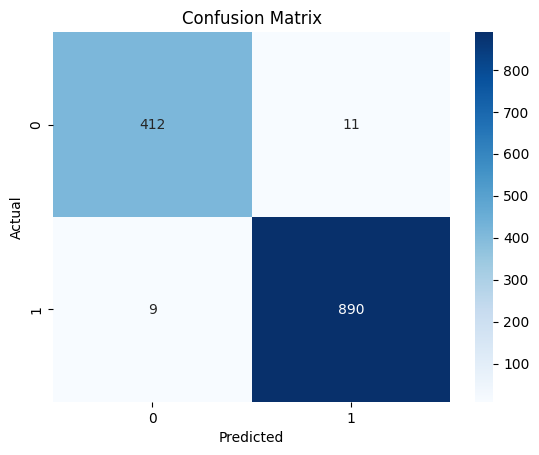

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       423
           1       0.99      0.99      0.99       899

    accuracy                           0.98      1322
   macro avg       0.98      0.98      0.98      1322
weighted avg       0.98      0.98      0.98      1322



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = best_model.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

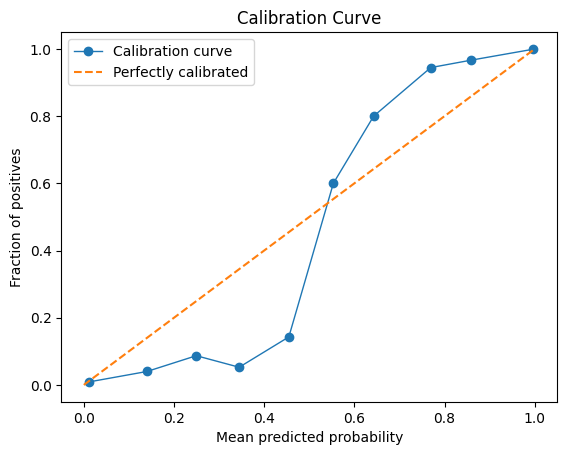

Brier score: 0.016499609515564832


In [41]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label="Calibration curve")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly calibrated")
plt.title("Calibration Curve")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()

# Compute Brier score
brier = brier_score_loss(y_test, y_probs)
print("Brier score:", brier)


In [42]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

feature_cols = ['Academic_history', 'Attendance', 'Parental_support', 'Access_to_resources',
                'Extracurricular_Activities', 'Mental_health', 'Previous_Scores', 'Motivation_Level',
                'Internet_Access', 'Academic_support', 'Family_Income', 'Understand_ability', 'School_Type',
                'Peer_Influence', 'Physical_Activity', 'Mental_illness', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
# Assume X_train and y_train are already defined (and not scaled or scaled as needed)
# and feature_cols is a list of feature names
model_lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_lr.fit(X_train, y_train)

# Get the coefficients (for binary classification, coef_ is 2D with one row)
coefficients = model_lr.coef_[0]

# Create a DataFrame to display feature coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': coefficients,
    'AbsCoefficient': abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

print("Feature importances from L1 Logistic Regression:")
print(coef_df)


Feature importances from L1 Logistic Regression:
                       Feature  Coefficient  AbsCoefficient
3          Access_to_resources     3.003267        3.003267
2             Parental_support     2.965516        2.965516
8              Internet_Access     2.669777        2.669777
15              Mental_illness    -2.605091        2.605091
4   Extracurricular_Activities     1.764330        1.764330
7             Motivation_Level     1.661989        1.661989
13              Peer_Influence     1.635136        1.635136
16    Parental_Education_Level     1.581247        1.581247
10               Family_Income     1.518299        1.518299
17          Distance_from_Home    -1.515629        1.515629
9             Academic_support     1.431897        1.431897
11          Understand_ability     1.424612        1.424612
0             Academic_history     0.881585        0.881585
1                   Attendance     0.605164        0.605164
14           Physical_Activity     0.580881        

Permutation Importance:
                       Feature  Importance
1                   Attendance    0.282300
0             Academic_history    0.195083
2             Parental_support    0.077534
6              Previous_Scores    0.074584
9             Academic_support    0.070121
3          Access_to_resources    0.068003
7             Motivation_Level    0.040015
10               Family_Income    0.039637
13              Peer_Influence    0.038427
16    Parental_Education_Level    0.035023
17          Distance_from_Home    0.030484
11          Understand_ability    0.026172
4   Extracurricular_Activities    0.020877
14           Physical_Activity    0.020348
8              Internet_Access    0.017020
15              Mental_illness    0.014523
12                 School_Type    0.000756
18                      Gender    0.000000
5                Mental_health   -0.000756


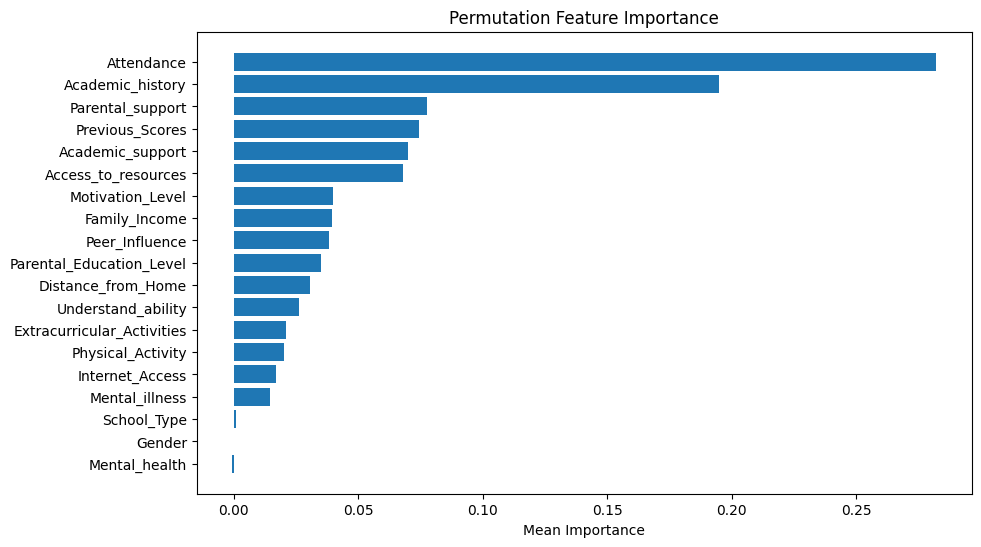

In [43]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance using your best_model (or any trained model)
# Ensure that X_test and y_test are defined
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(perm_df)

# Optional: Plot the permutation importances
plt.figure(figsize=(10,6))
plt.barh(perm_df['Feature'], perm_df['Importance'])
plt.xlabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [44]:
!pip install shap

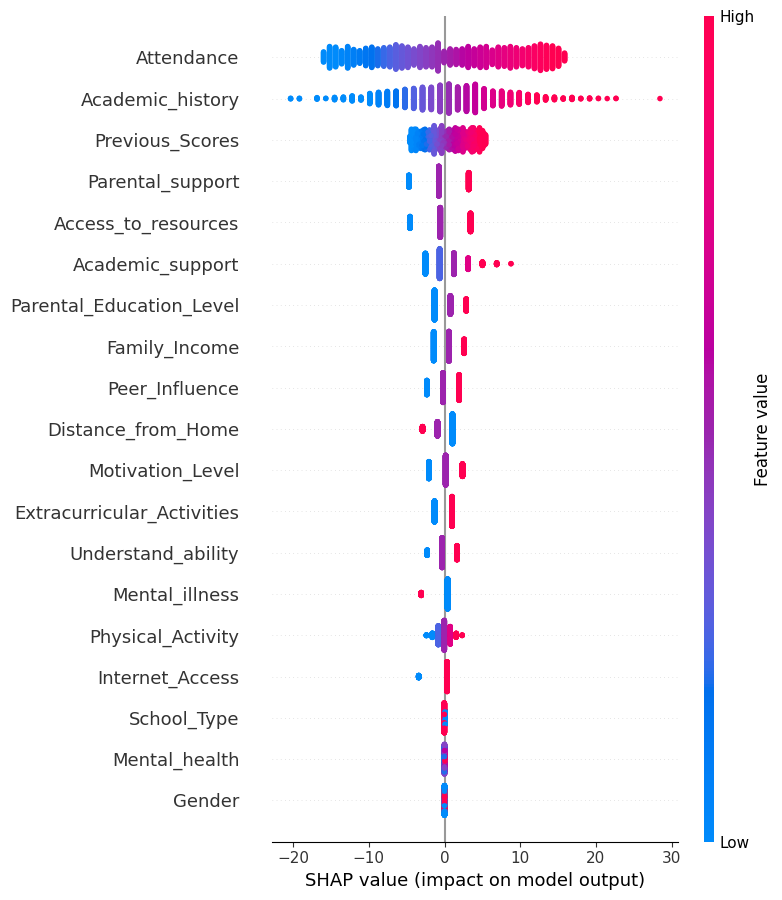

In [45]:
import shap

# Use an appropriate explainer based on your model type
# For tree-based models (e.g., RandomForest, XGBoost), use TreeExplainer
# For linear models, you might use LinearExplainer; for a generic approach, use Explainer.
# Here, we use the generic approach:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Summary plot to visualize feature impact
shap.summary_plot(shap_values, X_test, feature_names=feature_cols)


TESTtest

In [46]:
import random

dfs = data.sample(n=1000, random_state=42)
dfs

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
743,20,71,2,1,0,7,87,3,1,1,2,2,1,-1,5,0,1,1,0,0
5551,22,71,2,1,1,7,98,1,1,2,1,3,1,0,2,0,1,2,1,0
3442,21,91,3,2,1,6,53,3,1,1,2,2,1,1,3,0,3,1,1,1
6571,12,91,2,1,1,8,81,1,1,0,1,1,1,1,4,0,1,2,0,0
4204,21,63,1,3,1,8,95,2,1,2,3,2,1,0,5,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,11,89,1,3,0,9,69,1,1,1,1,1,1,0,3,0,1,1,0,0
6003,17,85,3,3,1,6,66,2,1,0,2,3,1,0,2,0,2,2,1,1
6129,11,77,1,1,1,6,92,1,1,0,1,2,1,0,5,0,1,1,0,0
3829,23,73,1,3,0,5,60,3,1,1,2,2,0,1,2,0,3,1,1,1


In [47]:
dfs.describe()

,Academic_history,Attendance,Parental_support,Access_to_resources,Extracurricular_Activities,Mental_health,Previous_Scores,Motivation_Level,Internet_Access,Academic_support,Family_Income,Understand_ability,School_Type,Peer_Influence,Physical_Activity,Mental_illness,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.959000,80.463000,2.079000,2.130000,0.597000,7.034000,75.536000,1.919000,0.931000,1.429000,1.784000,2.17700,0.699000,0.177000,2.966000,0.08300,1.691000,1.488000,0.423000,0.677000
std,6.107096,11.578458,0.693715,0.706824,0.490746,1.497025,14.217836,0.702091,0.253581,1.198497,0.740197,0.59668,0.458922,0.732262,1.014827,0.27602,0.777254,0.663548,0.494283,0.467857
min,2.000000,60.000000,1.000000,1.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,-1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,71.000000,2.000000,2.000000,0.000000,6.000000,64.000000,1.000000,1.000000,1.000000,1.000000,2.00000,0.000000,0.000000,2.000000,0.00000,1.000000,1.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.000000,76.000000,2.000000,1.000000,1.000000,2.000000,2.00000,1.000000,0.000000,3.000000,0.00000,1.000000,1.000000,0.000000,1.000000
75%,24.000000,91.000000,3.000000,3.000000,1.000000,8.000000,88.000000,2.000000,1.000000,2.000000,2.000000,3.00000,1.000000,1.000000,4.000000,0.00000,2.000000,2.000000,1.000000,1.000000
max,39.000000,100.000000,3.000000,3.000000,1.000000,10.000000,100.000000,3.000000,1.000000,5.000000,3.000000,3.00000,1.000000,1.000000,6.000000,1.00000,3.000000,3.000000,1.000000,1.000000


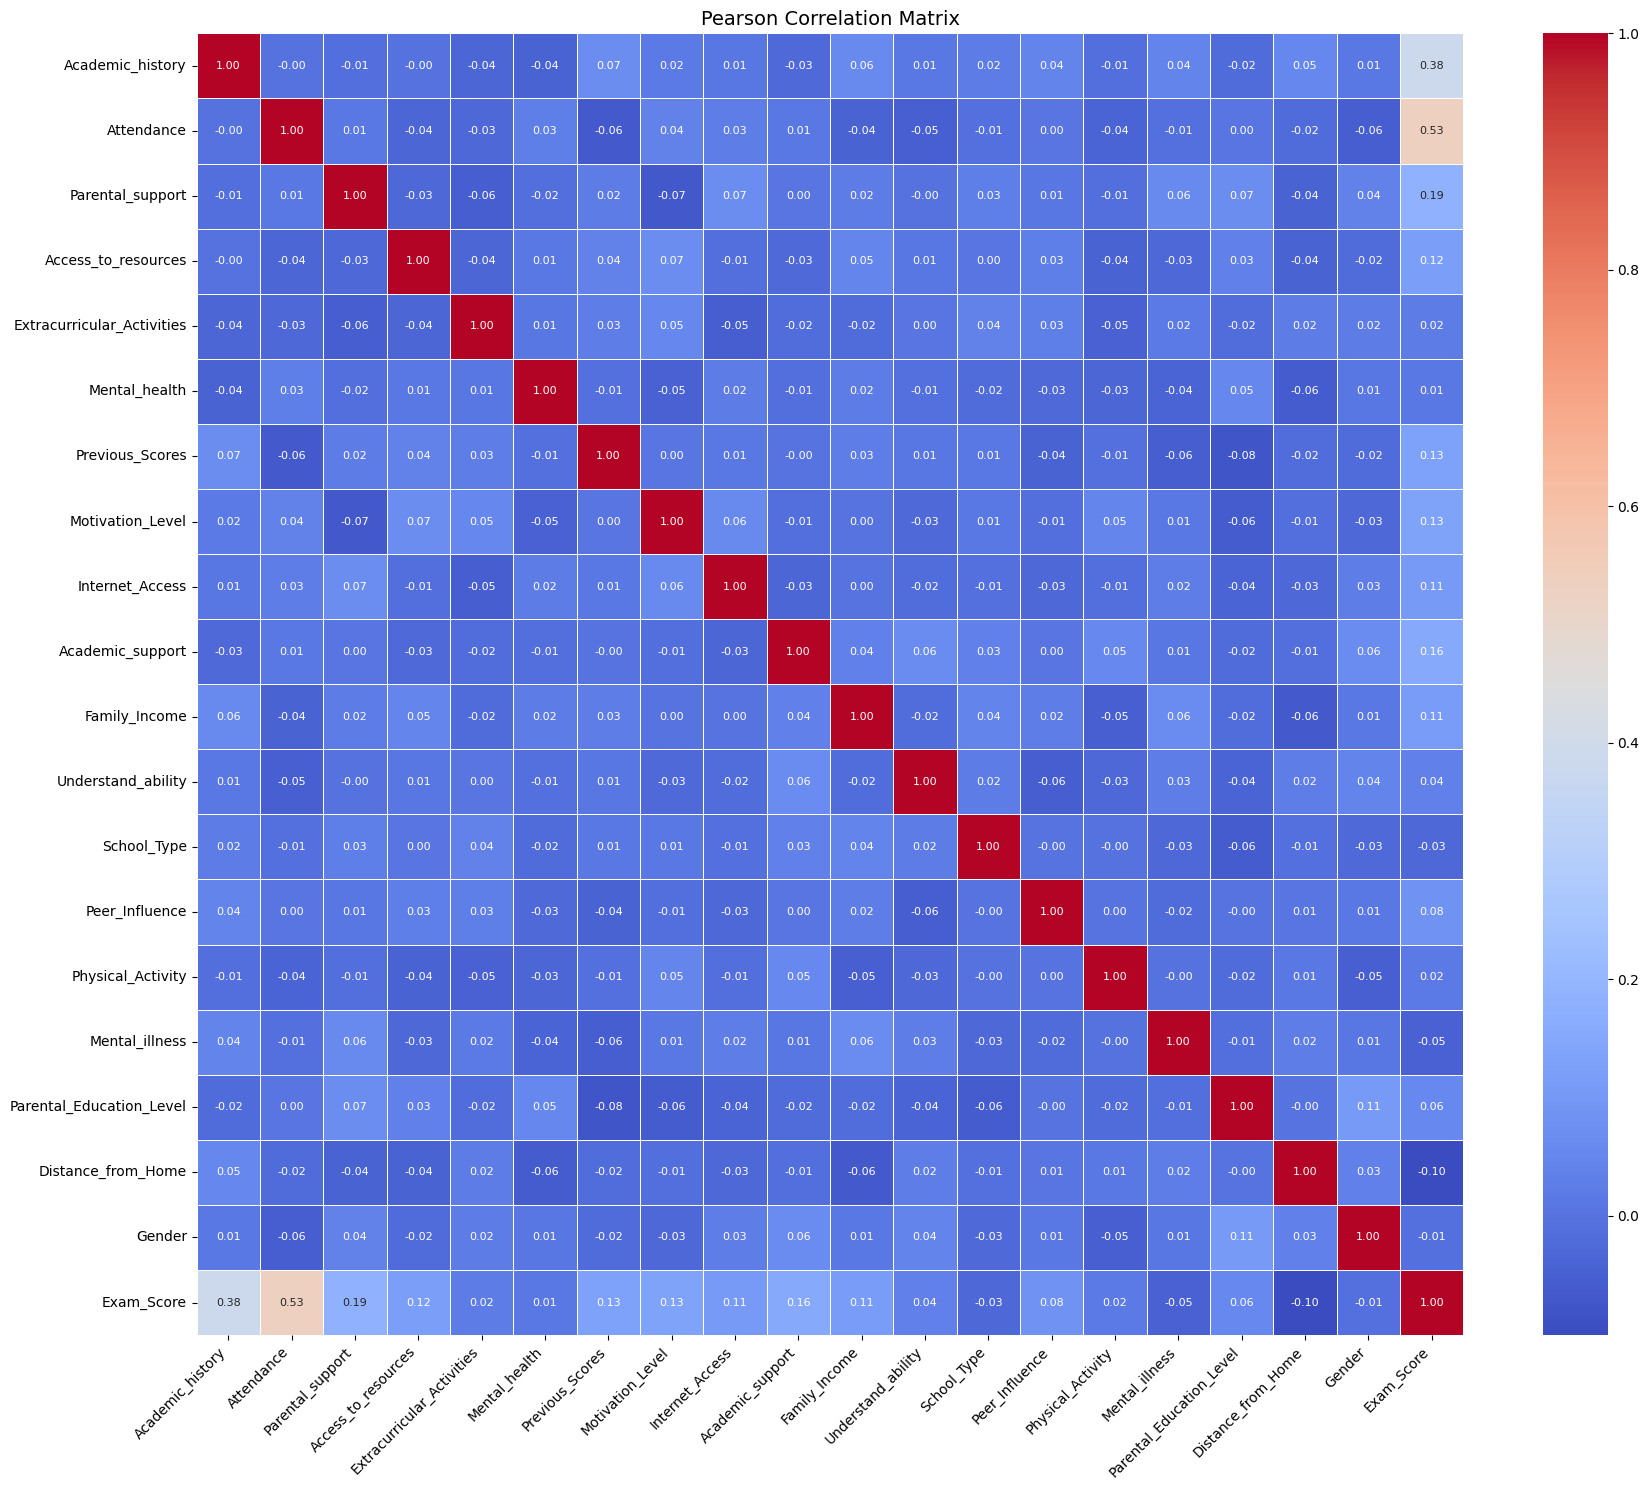

In [48]:
# Calculate the Pearson correlation matrix
pearson_corr = dfs.corr(method='pearson')
plt.figure(figsize=(18, 15))  # Increase figure size
sns.heatmap(
    pearson_corr,
    annot=True,
    cmap='coolwarm',
    annot_kws={'size': 8},  # Smaller annotation font
    fmt=".2f",  # Show 2 decimal places
    linewidths=0.5
)
plt.title("Pearson Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label cutoff
plt.show()

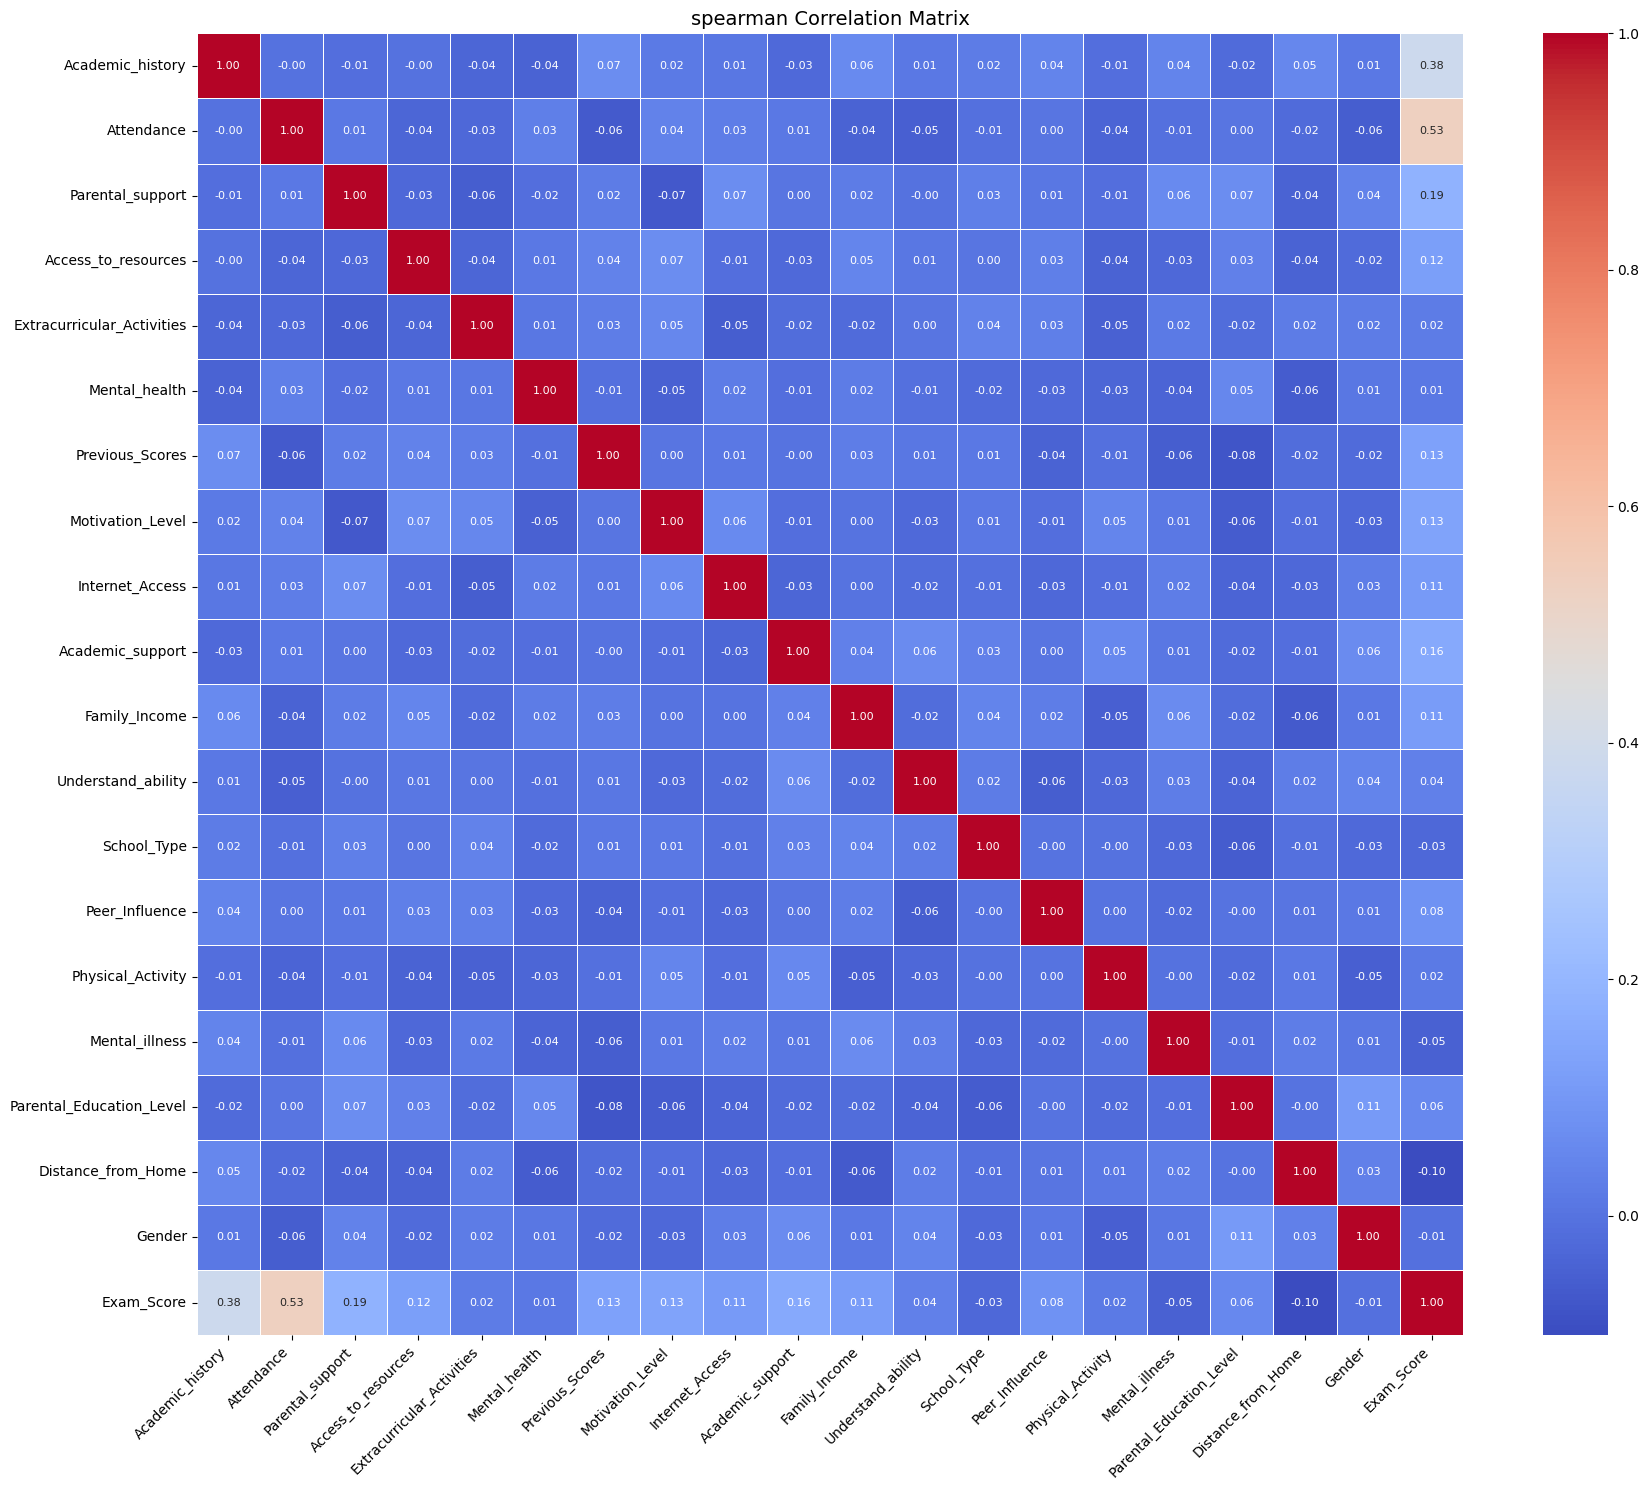

In [49]:
# Calculate the Spearman correlation matrix
spearman_corr = dfs.corr(method='spearman')
plt.figure(figsize=(18, 15))  # Increase figure size
sns.heatmap(
    pearson_corr,
    annot=True,
    cmap='coolwarm',
    annot_kws={'size': 8},  # Smaller annotation font
    fmt=".2f",  # Show 2 decimal places
    linewidths=0.5
)
plt.title("spearman Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [2]:
# import seaborn as sns
# plt.figure(figsize=(15, 8))
# sns.heatmap(dfs)